It`s first lesson for rewieving Machine learning

In [96]:
import pandas as pd
import seaborn as sn
df=sn.load_dataset("titanic")
print(df.shape)
print(df.columns)
print(df.first)
print(df.columns.dtype)
df.info()
df.dtypes

(891, 15)
Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')
<bound method NDFrame.first of      survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500 

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [87]:
nums=df.select_dtypes(include=['int64','float64'])
mean_df=nums.mean()
print(mean_df)
med_df=nums.median()
print(med_df)
mode_df=nums.mode().iloc[0]
print(mode_df)

survived     0.383838
pclass       2.308642
age         29.699118
sibsp        0.523008
parch        0.381594
fare        32.204208
dtype: float64
survived     0.0000
pclass       3.0000
age         28.0000
sibsp        0.0000
parch        0.0000
fare        14.4542
dtype: float64
survived     0.00
pclass       3.00
age         24.00
sibsp        0.00
parch        0.00
fare         8.05
Name: 0, dtype: float64


In [90]:
import pandas as pd 
print(df['sex'].nunique())
print(df['embarked'].nunique())
print(df.groupby("sex")["survived"].mean())
print(df.groupby("pclass")["fare"].mean())
pd.pivot_table(df,values='survived',index='sex',columns='pclass', aggfunc='mean')


2
3
sex
female    0.742038
male      0.188908
Name: survived, dtype: float64
pclass
1    84.154687
2    20.662183
3    13.675550
Name: fare, dtype: float64


pclass,1,2,3
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [ ]:
print(df.isnull().sum().sort_values(ascending=False))


deck           688
age            177
embarked         2
embark_town      2
sex              0
pclass           0
survived         0
fare             0
parch            0
sibsp            0
class            0
adult_male       0
who              0
alive            0
alone            0
dtype: int64


In [60]:
df['age'].fillna({'age':df['age'].mean()},inplace=True)
df['embarked'].fillna('S',inplace=True)
df['embark_town'].fillna('Southampton',inplace=True)
df['deck'].fillna(df['deck'].mode().iloc[0],inplace=True)
print(df.isnull().sum().sort_values(ascending=False))

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64


C:\Users\i7\AppData\Local\Temp\ipykernel_14108\3025156035.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna({'age':df['age'].mean()},inplace=True)


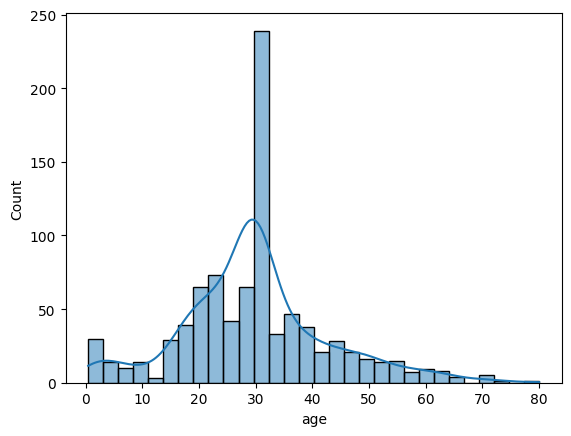

In [67]:
import matplotlib.pyplot as plt
sn.histplot(df['age'], kde=True)
plt.show()

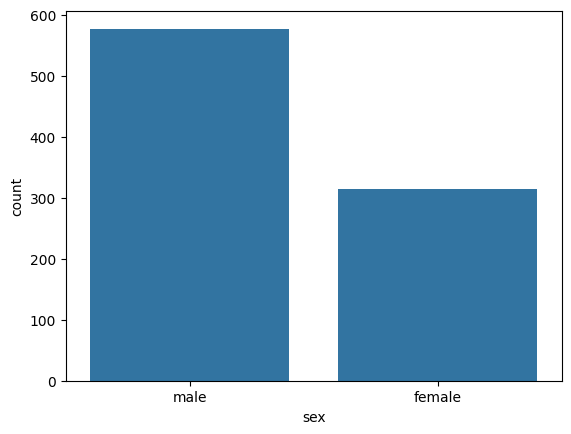

In [68]:
sn.countplot(x='sex',data=df)
plt.show()

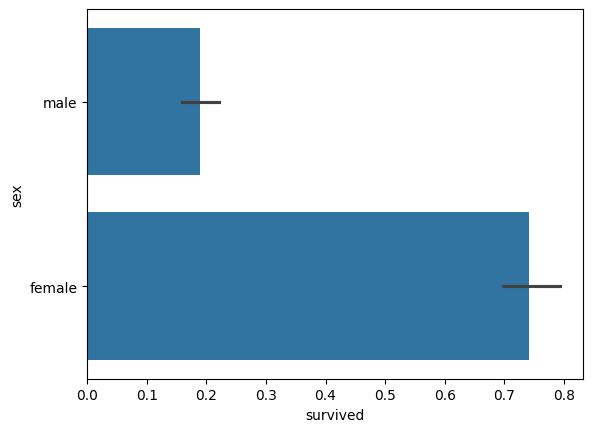

In [70]:
sn.barplot(x='survived',y='sex',data=df)
plt.show()

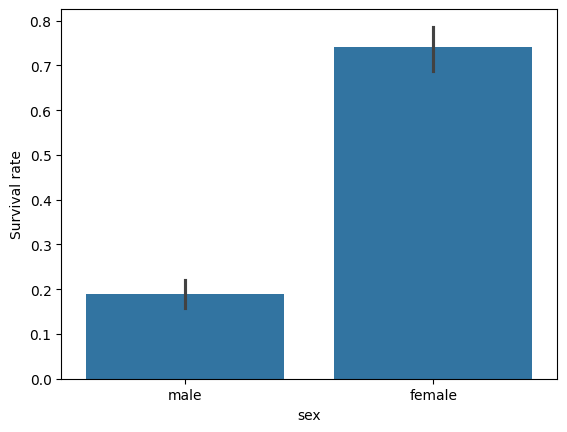

In [71]:
sn.barplot(x='sex',y='survived',data=df)
plt.ylabel("Survival rate")
plt.show()

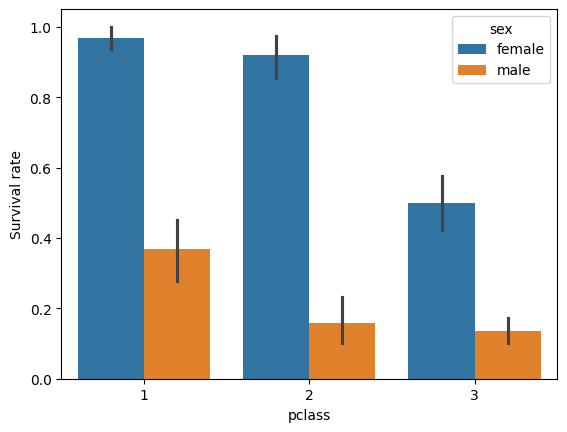

In [72]:
sn.barplot(x="pclass",y='survived',hue='sex',data=df)
plt.ylabel("Survival rate")
plt.show()

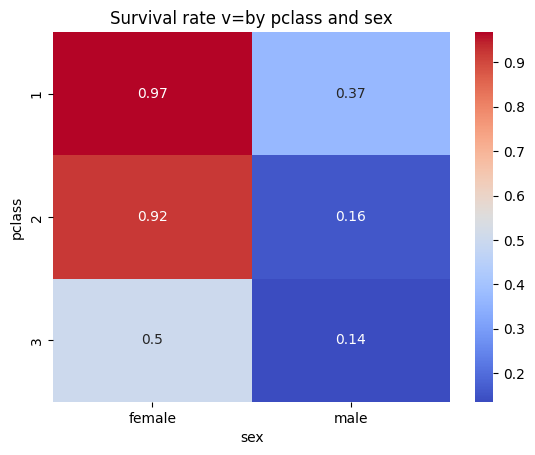

In [73]:
pivot_ps=pd.pivot_table(df,values='survived',index='pclass',columns='sex',aggfunc='mean')

sn.heatmap(pivot_ps,annot=True,cmap='coolwarm')
plt.title("Survival rate v=by pclass and sex")
plt.show()

In [76]:
df.duplicated().sum()

np.int64(108)

In [77]:
df.drop_duplicates(inplace=True)

In [ ]:
pd.get_dummies(df,columns=['embarked'],drop_first=True)

,survived,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,deck,embark_town,alive,alone,embarked_Q,embarked_S
0,0,3,0,22.0,1,0,7.2500,Third,man,True,NaN,Southampton,no,False,False,True
1,1,1,1,38.0,1,0,71.2833,First,woman,False,C,Cherbourg,yes,False,False,False
2,1,3,1,26.0,0,0,7.9250,Third,woman,False,NaN,Southampton,yes,True,False,True
3,1,1,1,35.0,1,0,53.1000,First,woman,False,C,Southampton,yes,False,False,True
4,0,3,0,35.0,0,0,8.0500,Third,man,True,NaN,Southampton,no,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,Second,man,True,NaN,Southampton,no,True,False,True
887,1,1,1,19.0,0,0,30.0000,First,woman,False,B,Southampton,yes,True,False,True
888,0,3,1,NaN,1,2,23.4500,Third,woman,False,NaN,Southampton,no,False,False,True
889,1,1,0,26.0,0,0,30.0000,First,man,True,C,Cherbourg,yes,True,False,False


In [98]:
df.isnull().sum()
df['sex']=df['sex'].map({'male':0,'female':1})

In [103]:
df['family_size']=df['sibsp']+df['parch']+1
df['isalone']=(df['family_size']==1).astype(int)
print(df['family_size'],df['isalone'])

0      2
1      2
2      1
3      2
4      1
      ..
886    1
887    1
888    4
889    1
890    1
Name: family_size, Length: 891, dtype: int64 0      0
1      0
2      1
3      0
4      1
      ..
886    1
887    1
888    0
889    1
890    1
Name: isalone, Length: 891, dtype: int64


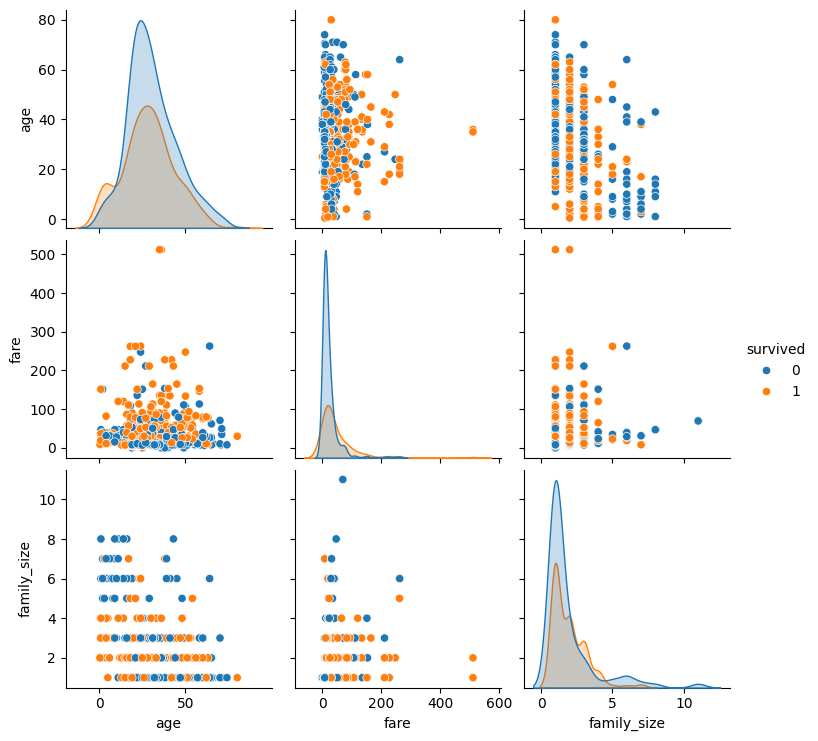

In [104]:
sn.pairplot(
    df[['age','fare','family_size','survived']],
    hue='survived'
)
plt.show()

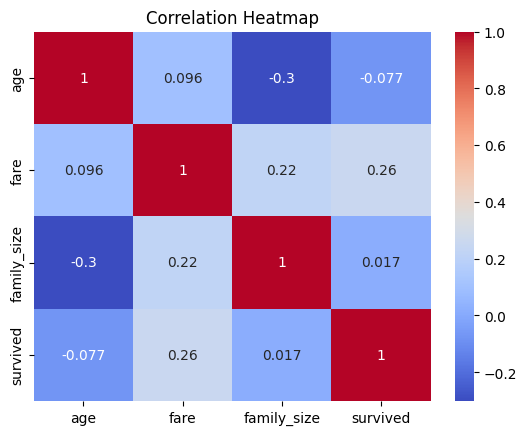

In [105]:
corr=df[['age','fare','family_size','survived']].corr()
sn.heatmap(corr,annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()